*시험문제 예제
1. 서울역의 시간대별로 승차 인원 그래프를 그리세요.(선그래프/plot)
2. 아침9~10시 사이에 하차인원이 가장 많은 역 5개를 찾으세요. 그리고 bar그래프로 그리세요.
3. 승차인원에 비해서 하차 인원의 비율이 높은 역 5개를 찾으세요.
4. 하루 중 승차 인원이 가장 많은 시간은 언제입니까? (예 1시~2시)
5. 무임 하차 비율이 가장 높은 역 5개를 찾으세요.

In [1]:
#1. 서울역의 시간대별로 승차 인원 그래프를 그리세요.(선그래프/plot)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#가산점
df = pd.read_excel('tmoney.xls', sheet_name=3, encoding='cp949', index_col=3, skiprows=1)
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,승차,하차,승차.1,하차.1,승차.2,하차.2,승차.3,...,하차.19,승차.20,하차.20,승차.21,하차.21,승차.22,하차.22,승차.23,하차.23,Unnamed: 52
서울역,2019-05,1호선,150,"1,148",21,"11,958","10,579","15,684","61,286","44,585",...,"22,083","4,127","7,762",3,548,0,0,0,0,2019-06-03 10:56:25
시청,2019-05,1호선,151,89,5,"2,843","4,674","4,169","24,963","8,926",...,"4,767",931,"1,426",1,25,0,0,0,0,2019-06-03 10:56:25
종각,2019-05,1호선,152,116,3,"4,576","5,233","4,780","33,366","7,695",...,"5,882","3,973","1,565",1,1,0,0,0,0,2019-06-03 10:56:25
종로3가,2019-05,1호선,153,216,16,"5,505","3,036","4,790","16,235","7,163",...,"6,715","3,375","2,753",1,37,0,1,0,0,2019-06-03 10:56:25
종로5가,2019-05,1호선,154,51,3,"2,245","4,205","3,415","19,150","6,140",...,"3,661",810,"1,200",0,6,0,0,0,0,2019-06-03 10:56:25
동대문,2019-05,1호선,155,776,12,"17,333","2,452","12,614","9,043","19,979",...,"14,421","1,199","5,052",1,68,0,0,0,0,2019-06-03 10:56:25
신설동,2019-05,1호선,156,315,38,"11,021","2,103","11,002","9,714","22,990",...,"13,402",681,"3,383",0,39,0,0,0,0,2019-06-03 10:56:25
제기동,2019-05,1호선,157,360,6,"5,600","2,439","10,512","10,759","26,059",...,"9,194",393,"2,120",0,0,0,0,0,0,2019-06-03 10:56:25
청량리(서울시립대입구),2019-05,1호선,158,"1,430",9,"13,965","3,611","19,600","13,875","50,958",...,"20,670",547,"6,585",0,2,0,1,0,0,2019-06-03 10:56:25
동묘앞,2019-05,1호선,159,136,11,"3,712",876,"3,992","4,354","7,349",...,"5,014",304,"3,516",5,298,0,0,0,0,2019-06-03 10:56:25


In [3]:
df.shape

(597, 52)

In [4]:
data = df.iloc[:,3:-1] #가산점, 마지막 -1은 포함 안한다.
data.loc['서울역']

,승차,하차,승차.1,하차.1,승차.2,하차.2,승차.3,하차.3,승차.4,하차.4,...,승차.19,하차.19,승차.20,하차.20,승차.21,하차.21,승차.22,하차.22,승차.23,하차.23
서울역,"1,148",21,"11,958","10,579","15,684","61,286","44,585","115,354","89,357","238,583",...,"37,939","22,083","4,127","7,762",3,548,0,0,0,0
서울역,231,8,"5,493","1,112","7,325","20,106","14,219","41,833","21,160","108,752",...,"7,632","15,932",832,"5,569",1,672,0,0,0,0
서울역,5,4,63,310,81,"2,130","9,052","3,101","18,943","4,233",...,"6,013",428,"1,071",29,0,0,0,0,0,0
서울역,4,0,763,11,"1,187","8,055","2,200","17,813","3,805","53,440",...,"2,892","1,741",2,148,0,0,0,0,0,0
서울역,0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
서울역,235,2,"5,886","1,512","7,067","14,970","14,821","21,519","21,942","30,321",...,"9,580","6,582",173,"3,003",0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 597 entries, 서울역 to 신설동
Data columns (total 52 columns):
Unnamed: 0     597 non-null object
Unnamed: 1     597 non-null object
Unnamed: 2     597 non-null int64
승차             597 non-null object
하차             597 non-null int64
승차.1           597 non-null object
하차.1           597 non-null object
승차.2           597 non-null object
하차.2           597 non-null object
승차.3           597 non-null object
하차.3           597 non-null object
승차.4           597 non-null object
하차.4           597 non-null object
승차.5           597 non-null object
하차.5           597 non-null object
승차.6           597 non-null object
하차.6           597 non-null object
승차.7           597 non-null object
하차.7           597 non-null object
승차.8           597 non-null object
하차.8           597 non-null object
승차.9           597 non-null object
하차.9           597 non-null object
승차.10          597 non-null object
하차.10          597 non-null object
승차.11          597 non-nu

In [6]:
data = data.replace(',','', regex=True)  #, 없애기

In [7]:
data = data.astype(np.int)  # 정수로 변환

In [8]:
# 서울역이 여러개다 더하자
seoul = data.loc['서울역']

In [9]:
np.sum(data.loc['서울역'],axis=0)

승차         1623
하차           35
승차.1      24163
하차.1      13524
승차.2      31344
하차.2     106547
승차.3      84877
하차.3     199620
승차.4     155208
하차.4     435329
승차.5     125169
하차.5     273124
승차.6     128952
하차.6     161670
승차.7     158030
하차.7     147733
승차.8     168135
하차.8     158645
승차.9     168599
하차.9     157090
승차.10    139890
하차.10    152865
승차.11    194365
하차.11    160314
승차.12    203776
하차.12    171242
승차.13    275998
하차.13    190161
승차.14    423648
하차.14    202544
승차.15    234365
하차.15    157649
승차.16    172968
하차.16    117160
승차.17    159544
하차.17    102805
승차.18    122083
하차.18     81341
승차.19     64057
하차.19     46766
승차.20      6206
하차.20     16511
승차.21         4
하차.21      1220
승차.22         0
하차.22         0
승차.23         0
하차.23         0
dtype: int64

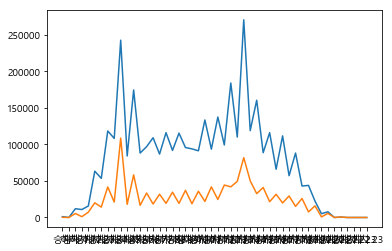

In [76]:
plt.rc('font', family='Malgun Gothic')
plt.plot(np.sum(seoul[::2], axis=0)) # 짝수 : 승차
plt.plot(np.sum(seoul[1:2], axis=0)) # 홀수 : 하차

In [11]:
# 2.아침9~10시 사이에 하차인원이 가장 많은 역 5개를 찾으세요.

In [12]:
data.head()

,승차,하차,승차.1,하차.1,승차.2,하차.2,승차.3,하차.3,승차.4,하차.4,...,승차.19,하차.19,승차.20,하차.20,승차.21,하차.21,승차.22,하차.22,승차.23,하차.23
서울역,1148,21,11958,10579,15684,61286,44585,115354,89357,238583,...,37939,22083,4127,7762,3,548,0,0,0,0
시청,89,5,2843,4674,4169,24963,8926,74288,11999,207024,...,14946,4767,931,1426,1,25,0,0,0,0
종각,116,3,4576,5233,4780,33366,7695,108663,12735,295205,...,48067,5882,3973,1565,1,1,0,0,0,0
종로3가,216,16,5505,3036,4790,16235,7163,33766,12372,88664,...,29318,6715,3375,2753,1,37,0,1,0,0
종로5가,51,3,2245,4205,3415,19150,6140,46654,10238,132023,...,11544,3661,810,1200,0,6,0,0,0,0


In [14]:
col = 11
morning_10_off = data.iloc[:,col]
morning_10_off

서울역             171350
시청               93843
종각              165873
종로3가            101464
종로5가             82787
동대문              33416
신설동              44845
제기동              49387
청량리(서울시립대입구)     47716
동묘앞              21482
시청               94153
을지로입구           169109
을지로3가            86952
을지로4가            42668
동대문역사문화공원        46570
신당               29126
상왕십리             22536
왕십리(성동구청)        25402
한양대              77921
뚝섬               66527
성수              105565
건대입구             60312
구의(광진구청)         28344
강변(동서울터미널)       63130
잠실나루             33192
잠실(송파구청)        194094
잠실새내             35717
종합운동장            27825
삼성(무역센터)        285440
선릉              235595
                 ...  
공항화물청사            4705
인천공항1터미널         28043
인천공항2터미널          8842
영종                2707
언주               39279
선정릉              40109
삼성중앙             24609
봉은사              70984
종합운동장             8639
삼전                5691
석촌고분              6079
석촌                7044
송파나루       

In [16]:
y = morning_10_off.sort_values(ascending=False)[:5]
y

강남          372474
삼성(무역센터)    285440
역삼          285044
선릉          235595
가산디지털단지     216339
Name: 하차.5, dtype: int32

<BarContainer object of 5 artists>

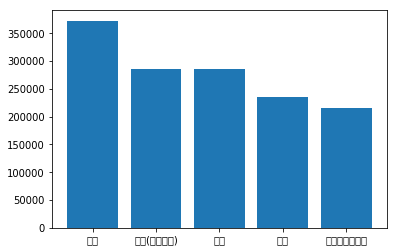

In [17]:
plt.bar(y.index,y)

In [18]:
# 3. 승차인원에 비해서 하차 인원의 비율이 높은 역 5개를 찾으세요.

In [20]:
data.head()

,승차,하차,승차.1,하차.1,승차.2,하차.2,승차.3,하차.3,승차.4,하차.4,...,승차.19,하차.19,승차.20,하차.20,승차.21,하차.21,승차.22,하차.22,승차.23,하차.23
서울역,1148,21,11958,10579,15684,61286,44585,115354,89357,238583,...,37939,22083,4127,7762,3,548,0,0,0,0
시청,89,5,2843,4674,4169,24963,8926,74288,11999,207024,...,14946,4767,931,1426,1,25,0,0,0,0
종각,116,3,4576,5233,4780,33366,7695,108663,12735,295205,...,48067,5882,3973,1565,1,1,0,0,0,0
종로3가,216,16,5505,3036,4790,16235,7163,33766,12372,88664,...,29318,6715,3375,2753,1,37,0,1,0,0
종로5가,51,3,2245,4205,3415,19150,6140,46654,10238,132023,...,11544,3661,810,1200,0,6,0,0,0,0


In [23]:
#짝수 : 승차, 홀수 : 하차
승차 = data.iloc[:,::2]
하차 = data.iloc[:,1::2]

In [61]:
승차.head()

,승차,승차.1,승차.2,승차.3,승차.4,승차.5,승차.6,승차.7,승차.8,승차.9,...,승차.14,승차.15,승차.16,승차.17,승차.18,승차.19,승차.20,승차.21,승차.22,승차.23
서울역,1148,11958,15684,44585,89357,68146,73525,92022,101383,102975,...,253795,144348,103166,101273,77000,37939,4127,3,0,0
시청,89,2843,4169,8926,11999,15592,18130,25026,28006,34962,...,166587,75363,61755,62698,40422,14946,931,1,0,0
종각,116,4576,4780,7695,12735,16786,22190,34804,43282,59065,...,247365,127487,113375,136748,106476,48067,3973,1,0,0
종로3가,216,5505,4790,7163,12372,17597,29264,43282,57116,72757,...,128697,96295,75192,82094,66614,29318,3375,1,0,0
종로5가,51,2245,3415,6140,10238,15872,25849,39106,49898,64227,...,127195,72829,51429,43705,32254,11544,810,0,0,0


In [26]:
승차합 = np.sum(승차, axis=1)
하차합 = np.sum(하차, axis=1)

In [29]:
비율 = 하차합/승차합

In [30]:
비율.sort_values(ascending=False)[:5]

서울역      1.730587
인천       1.688396
선릉       1.683228
고속터미널    1.540680
공덕       1.317531
dtype: float64

In [31]:
# 4. 하루 중 승차 인원이 가장 많은 시간은 언제입니까? (예 1시~2시)

In [37]:
승하차인원 = np.sum(data, axis=0) #역하고 상관없으므로 sum
승하차인원

승차         136144
하차           1805
승차.1      3586585
하차.1       898015
승차.2      7173093
하차.2      4832960
승차.3     18673526
하차.3     10825762
승차.4     21660035
하차.4     25221174
승차.5     14028472
하차.5     16983239
승차.6     10597036
하차.6     11517371
승차.7     10488157
하차.7     10661291
승차.8     11472241
하차.8     10960729
승차.9     11989828
하차.9     11972059
승차.10    11825103
하차.10    11645773
승차.11    13071881
하차.11    12174940
승차.12    15115972
하차.12    13576205
승차.13    18553044
하차.13    16448990
승차.14    24606001
하차.14    22598377
승차.15    14232425
하차.15    19498447
승차.16    11346789
하차.16    12078838
승차.17    10917666
하차.17    10857052
승차.18     9124017
하차.18    10331842
승차.19     4163994
하차.19     6907366
승차.20      575460
하차.20     2311087
승차.21         456
하차.21       77043
승차.22         128
하차.22         139
승차.23           0
하차.23           0
dtype: int64

In [39]:
승차인원 = 승하차인원[::2]  #승차인원 : 짝수위치
승차인원

승차         136144
승차.1      3586585
승차.2      7173093
승차.3     18673526
승차.4     21660035
승차.5     14028472
승차.6     10597036
승차.7     10488157
승차.8     11472241
승차.9     11989828
승차.10    11825103
승차.11    13071881
승차.12    15115972
승차.13    18553044
승차.14    24606001
승차.15    14232425
승차.16    11346789
승차.17    10917666
승차.18     9124017
승차.19     4163994
승차.20      575460
승차.21         456
승차.22         128
승차.23           0
dtype: int64

In [42]:
np.max(승차인원)

24606001

In [46]:
index = np.argmax(승차인원.values)
index

14

In [48]:
4+ np.argmax(승차인원.values), '시'  #시작시간 04:00이어서 4시간 더해준다.

(18, '시')

In [49]:
#5. 무임 하차 비율이 가장 높은 역 5개를 찾으세요. 그리고 그래프 그리세요.

In [60]:
df = pd.read_excel('tmoney.xls', sheet_name=2, encoding='cp949', index_col=3, skiprows=0)
df.head()

,사용월,호선명,역ID,유임승차,유임하차,무임승차,무임하차,작업일시
지하철역,,,,,,,,
서울역,2019-05,1호선,150,"1,568,570","1,489,737","247,801","242,107",2019-06-03 10:56:20
시청,2019-05,1호선,151,"709,821","727,110","112,279","112,016",2019-06-03 10:56:20
종각,2019-05,1호선,152,"1,204,910","1,151,371","176,083","164,915",2019-06-03 10:56:20
종로3가,2019-05,1호선,153,"699,000","647,664","408,682","382,809",2019-06-03 10:56:20
종로5가,2019-05,1호선,154,"561,662","578,374","307,515","295,535",2019-06-03 10:56:20


In [54]:
df.shape

(597, 8)

In [65]:
subway = df.iloc[:,3:-1]
subway.head()

,유임승차,유임하차,무임승차,무임하차
지하철역,,,,
서울역,"1,568,570","1,489,737","247,801","242,107"
시청,"709,821","727,110","112,279","112,016"
종각,"1,204,910","1,151,371","176,083","164,915"
종로3가,"699,000","647,664","408,682","382,809"
종로5가,"561,662","578,374","307,515","295,535"


In [66]:
subway = subway.replace(',','',regex=True)
subway = subway.astype('int')

In [67]:
subway.head()

,유임승차,유임하차,무임승차,무임하차
지하철역,,,,
서울역,1568570,1489737,247801,242107
시청,709821,727110,112279,112016
종각,1204910,1151371,176083,164915
종로3가,699000,647664,408682,382809
종로5가,561662,578374,307515,295535


In [68]:
유임하차 = subway['유임하차']
무임하차 = subway['무임하차']
비율 = 무임하차/유임하차

In [70]:
y = 비율.sort_values(ascending=False)[:5]
y

지하철역
소요산    1.746963
제기동    1.309750
용문     1.127742
원덕     1.054845
지평     1.047414
dtype: float64

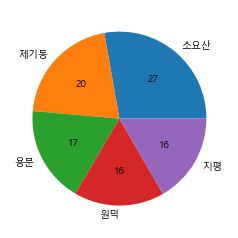

In [74]:
plt.rc('font', family='Malgun Gothic')
m = plt.pie(y, labels=y.index, autopct='%d')

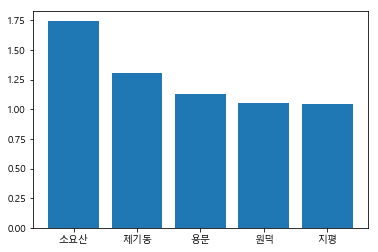

In [75]:
m = plt.bar(y.index, y)